## 2013 Colorado Springs Flood Analysis

In September 2013 cities along the [Colorado Front Range experienced historic flooding](https://en.wikipedia.org/wiki/2013_Colorado_floods). Below is an analysis of the streamflow data from Colorado Springs. [Colorado Springs](https://gazette.com/business/2013-in-review-fires-floods-top-stories-in-the-colorado-springs-area/article_089d022a-1e55-5765-b52b-9e1eeec2a953.html).

In [13]:
import subprocess
from io import BytesIO
import warnings

import folium
import hvplot.pandas
import pandas as pd
import requests

warnings.filterwarnings('ignore')


In [14]:
# define url for data
csprings_url = ("https://waterdata.usgs.gov/nwis/dv"
                "?cb_00060=on"
                "&format=rdb"
                "&site_no=07103700"
                "&legacy=&referred_module=sw&period="
                "&begin_date=1922-10-01"
                "&end_date=2022-09-30")


# Send an HTTP GET request to the URL
csprings_url_response = requests.get(csprings_url)

In [15]:
csprings_q_df = pd.read_csv(
    BytesIO(csprings_url_response.content),
    comment="#",
    delimiter="\t",
    skiprows=[27, 28],
    names=["agency_cd", "site_no", "datetime", "streamflow_cfs", "code"],
    index_col="datetime",
    parse_dates=True,
)

In [16]:
csprings_flood_df = csprings_q_df['2012-10':'2014-09']

<Axes: title={'center': 'Streamflow at Fountain Creek (water years 2013 and 2014)'}, xlabel='Date', ylabel='Streamflow (cfs)'>

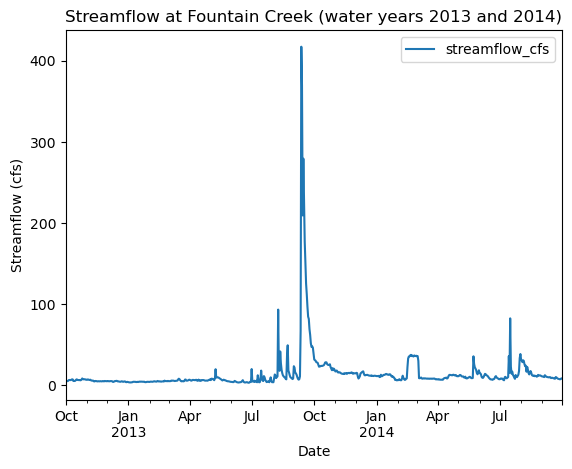

In [27]:
# Plot flood data subset
csprings_flood_df.plot(y='streamflow_cfs', xlabel='Date', ylabel='Streamflow (cfs)', title='Streamflow at Fountain Creek (water years 2013 and 2014)')

## Major flooding in Fountain Creek in September of 2013 was preceeded by wildfires and smaller flooding events in August

In [18]:
# Plot all streamflow data
# csprings_q_df.plot(y='streamflow_cfs', xlabel='Date', ylabel='Streamflow (cfs)')

In [19]:
# Resamples streamflow for annual maximum value
csprings_ann_max_q_df = csprings_q_df[['streamflow_cfs']].resample('AS').max()
# csprings_ann_max_q_df

<Axes: xlabel='Year', ylabel='Annual maximum streamflow (cfs)'>

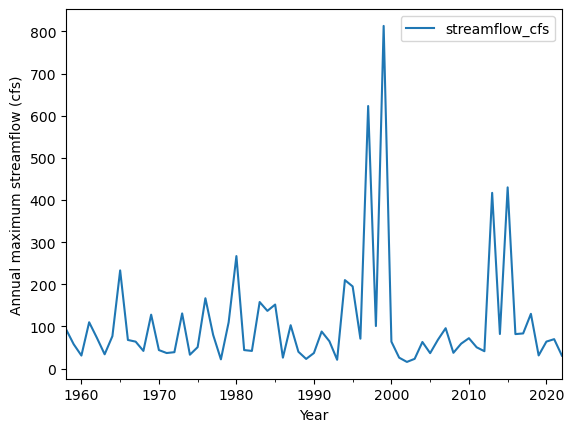

In [20]:
# Plot annual maximum streamflow
csprings_ann_max_q_df.plot(xlabel='Year', ylabel='Annual maximum streamflow (cfs)')

## The maxmimum streamflow reached during the 2013 flood in Fountain Creek near Colorado Springs has only been recorded four times in the past 100 years.

### The annual maximum streamflow of Fountain Creek near Colorado Springs was reached again in 2015. Two even bigger flooding events are recorded on this stretch of river in the late 1990s.


In [21]:
# Calculate 
csprings_ann_max_q_post_df = csprings_ann_max_q_df['1923':].copy()
csprings_ann_max_q_post_df['exceed_prob'] = (
    csprings_ann_max_q_post_df
    .rank(ascending=False)
    / len(csprings_ann_max_q_post_df))
csprings_ann_max_q_post_df['return_period'] = (
    1 / csprings_ann_max_q_post_df['exceed_prob']
)
# csprings_ann_max_q_post_df

<Axes: title={'center': 'Fountain Creek near Colorado Springs, CO annual maximum streamflow (cfs)'}, xlabel='Year', ylabel='Return period '>

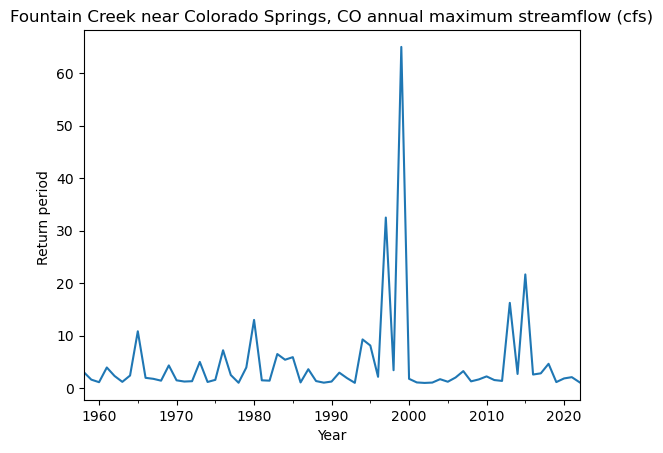

In [22]:
csprings_ann_max_q_post_df.return_period.plot(xlabel='Year', ylabel='Return period ', title='Fountain Creek near Colorado Springs, CO annual maximum streamflow (cfs)')

### The maximum streamflow on Fountain Creek in 2013 has a 25-year return period. 

## Site Description:

The stream gauge data used in this analysis was collected at the [Fountain Creek near Colorado Springs](https://dashboard.waterdata.usgs.gov/api/gwis/2.1/service/site?agencyCode=USGS&siteNumber=07103700&open=211184). The site is located near the border with neighboring Manitou Springs on the western edge of Colorado Springs. The stream gauge is located on Fountain Creek about 2 miles upstream of the confluence with Monument Creek. The Colorado Springs metropolitan area is home to about 750,000 people and is located in the ancestral homelands of the Ute, Cheyenne, and Arapaho peoples. Colorado Springs lies at the base of Pikes Peak in the Front Range of the southern Rocky Mountains at the transition into the plains, and comprises ecosystems spaning from alpine-subalpine coniferous forests, to shrublands to grasslands. Colorado Springs has a semi-arid climate with cold winters and hot-dry summers. Most precipitation falls during afternoon thunderstorms in the late summer

## Site Map: Fountain Creek near Colorado Springs, CO

In [23]:
# YOUR CODE HERE
sg_lat = 38.85471357
sg_lon = -104.8780314

# Initialize map and tweak settings
m = folium.Map(
    # Location to display
    location=(sg_lat, sg_lon),
    tiles="Stamen Terrain",
    # Turns off annoying zooming while trying to scroll to the next cell
    scrollWheelZoom=False)

# Put a marker at the stream gauge location
folium.Marker([sg_lat, sg_lon], popup="Fountain Creek near Colorado Springs").add_to(m)

# Display the map
m

## Data Description:
The data used in this analysis were collected from site 07103700 "Fountain Creek near Colorado Springs, CO" by the USGS spanning water years 1922 through 2022 (October 1, 1922 to September 30, 2022). Daily mean discharge data are reported in units of cubic feet per second (cfs).

## Data citation: 
U.S. Geological Survey, 2016, National Water Information System data available on the World Wide Web (USGS Water Data for the Nation), accessed [September 17, 2023], at URL [http://waterdata.usgs.gov/nwis/].

In [24]:
%%bash
jupyter nbconvert 01-time-series-CoSprgs-Flood.ipynb --to html --no-input

[NbConvertApp] Converting notebook 01-time-series-CoSprgs-Flood.ipynb to html
[NbConvertApp] Writing 433775 bytes to 01-time-series-CoSprgs-Flood.html
